Imortando as blibliotecas

In [25]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


/home/dieinimy/.pyenv/versions/3.7.4/envs/textMining/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Caso de erro basta executar a linha abaixo:

nltk.download('punkt')

Carregar arquivo texto<br/>
Alterei o código para uma maneira melhor para ler o arquivo

In [26]:
with open('maconha.txt','r') as f:
    texto = ""
    while 1:
        line = f.readline()
        if not line:
            break
        texto += line

In [27]:
print(texto)

A cada dia que passa, mais se fala sobre a legalização da maconha. Seja nas escolas, nos jornais ou no campo político, o assunto já não é mais tabu e defender a descriminalização ou legalização não é nem de longe uma opinião polêmica. Até mesmo num país conservador como o nosso, já encontramos uma parcela da população sendo favorável à legalização tanto para fins medicinais, quanto para fins recreacionais. Com isto, muitos começam a criar hipóteses de coisas terríveis que poderiam acontecer no Brasil, caso a lei sofra mudanças. O curioso por trás disso é que ainda há muita gente que debate em torno de suposições e crenças do que poderia acontecer, ignorando completamente os experimentos existentes.

O porte de maconha já é descriminalizado em diversos lugares do mundo [1], além de ter seu uso para fins medicinais e até recreacionais sendo cada vez mais permitidos. Na América do Sul, por exemplo, países como Chile, Argentina e Colômbia já não criminalizam mais o porte da droga. Além dis

Fazendo a tokenização

In [28]:
tokenized_word=word_tokenize(texto)
print(tokenized_word)

['A', 'cada', 'dia', 'que', 'passa', ',', 'mais', 'se', 'fala', 'sobre', 'a', 'legalização', 'da', 'maconha', '.', 'Seja', 'nas', 'escolas', ',', 'nos', 'jornais', 'ou', 'no', 'campo', 'político', ',', 'o', 'assunto', 'já', 'não', 'é', 'mais', 'tabu', 'e', 'defender', 'a', 'descriminalização', 'ou', 'legalização', 'não', 'é', 'nem', 'de', 'longe', 'uma', 'opinião', 'polêmica', '.', 'Até', 'mesmo', 'num', 'país', 'conservador', 'como', 'o', 'nosso', ',', 'já', 'encontramos', 'uma', 'parcela', 'da', 'população', 'sendo', 'favorável', 'à', 'legalização', 'tanto', 'para', 'fins', 'medicinais', ',', 'quanto', 'para', 'fins', 'recreacionais', '.', 'Com', 'isto', ',', 'muitos', 'começam', 'a', 'criar', 'hipóteses', 'de', 'coisas', 'terríveis', 'que', 'poderiam', 'acontecer', 'no', 'Brasil', ',', 'caso', 'a', 'lei', 'sofra', 'mudanças', '.', 'O', 'curioso', 'por', 'trás', 'disso', 'é', 'que', 'ainda', 'há', 'muita', 'gente', 'que', 'debate', 'em', 'torno', 'de', 'suposições', 'e', 'crenças', '

Colocando todas as letras em minusculas

In [29]:
tokenized_word_2 = [w.lower() for w in tokenized_word]
print(tokenized_word_2)

['a', 'cada', 'dia', 'que', 'passa', ',', 'mais', 'se', 'fala', 'sobre', 'a', 'legalização', 'da', 'maconha', '.', 'seja', 'nas', 'escolas', ',', 'nos', 'jornais', 'ou', 'no', 'campo', 'político', ',', 'o', 'assunto', 'já', 'não', 'é', 'mais', 'tabu', 'e', 'defender', 'a', 'descriminalização', 'ou', 'legalização', 'não', 'é', 'nem', 'de', 'longe', 'uma', 'opinião', 'polêmica', '.', 'até', 'mesmo', 'num', 'país', 'conservador', 'como', 'o', 'nosso', ',', 'já', 'encontramos', 'uma', 'parcela', 'da', 'população', 'sendo', 'favorável', 'à', 'legalização', 'tanto', 'para', 'fins', 'medicinais', ',', 'quanto', 'para', 'fins', 'recreacionais', '.', 'com', 'isto', ',', 'muitos', 'começam', 'a', 'criar', 'hipóteses', 'de', 'coisas', 'terríveis', 'que', 'poderiam', 'acontecer', 'no', 'brasil', ',', 'caso', 'a', 'lei', 'sofra', 'mudanças', '.', 'o', 'curioso', 'por', 'trás', 'disso', 'é', 'que', 'ainda', 'há', 'muita', 'gente', 'que', 'debate', 'em', 'torno', 'de', 'suposições', 'e', 'crenças', '

Aqui, vamos retirar as chamadas stopwords (conjuncoes, preposicoes, palavras que não nos interessam)

1. Vamos ver quais stopwords ja existem na biblioteca

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("portuguese"))

Caso apresente algum erro execute o comando abaixo:

nltk.download('stopwords')

In [31]:
print(stop_words)

{'à', 'esses', 'estivessem', 'elas', 'houverá', 'estão', 'eram', 'seremos', 'havemos', 'num', 'éramos', 'tivera', 'tem', 'teríamos', 'tu', 'já', 'lhes', 'fui', 'delas', 'com', 'estes', 'era', 'isso', 'os', 'estivermos', 'fosse', 'estava', 'sem', 'quem', 'teus', 'sou', 'serei', 'fossem', 'fomos', 'minha', 'do', 'meu', 'ao', 'sua', 'tínhamos', 'houveríamos', 'houvemos', 'houver', 'vos', 'nossa', 'quando', 'estivéramos', 'estejamos', 'seus', 'houverei', 'houveram', 'foi', 'nós', 'forem', 'estamos', 'sejamos', 'houvermos', 'será', 'estivéssemos', 'tivessem', 'da', 'houveremos', 'houvessem', 'é', 'aqueles', 'ele', 'mesmo', 'tinham', 'qual', 'a', 'às', 'houve', 'tive', 'tivesse', 'pelo', 'seriam', 'pelos', 'das', 'como', 'eles', 'teria', 'e', 'tivemos', 'teve', 'tivéramos', 'em', 'fora', 'pelas', 'nossos', 'esteja', 'estiveram', 'não', 'estiverem', 'um', 'isto', 'tenham', 'estivemos', 'também', 'estavam', 'houvéramos', 'dos', 'são', 'houveriam', 'serão', 'estive', 'seríamos', 'na', 'estou', 

2. Vamos adicionar novas stopwords

coloquei o **'bbbbbbbbbbb'** porque ficava mais facil pra ver se deu certo a lista de stopwords depois

In [32]:
stop_words.update(('uso',',',';','%','.',':','bbbbbbbbbbbbbbb','-','droga','drogas','art.','–','http','[',']',"''"))
#print(stop_words)

3. Remover essas stopwords

In [33]:
tokenized_word_3=[]
for w in tokenized_word_2:
    if w not in stop_words:
        tokenized_word_3.append(w)

Se quiser comparar o antes e depois da remoção das stopwords

print("Tokenized Word:",tokenized_word)
print("Filterd Word:",tokenized_word_3)

Analisa distribuicao das palavras

In [34]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_3)
fdist.most_common(20)

[('legalização', 13),
 ('maconha', 8),
 ('ainda', 7),
 ('fins', 6),
 ('além', 6),
 ('medicinais', 4),
 ('disso', 4),
 ('sendo', 3),
 ('recreacionais', 3),
 ('acontecer', 3),
 ('brasil', 3),
 ('lei', 3),
 ('mudanças', 3),
 ('porte', 3),
 ('pode', 3),
 ('quantidade', 3),
 ('estudos', 3),
 ('queda', 3),
 ('dados', 3),
 ('danos', 3)]

# Grafico de distribuicao das palavras
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

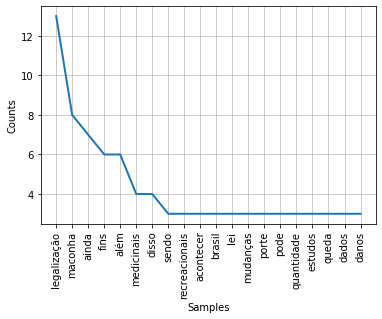

In [35]:
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

In [36]:
# Wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(tokenized_word_3))
img.to_file('worcloud.jpeg')

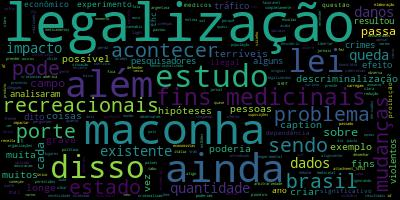

In [37]:
from IPython.display import Image
Image(filename='worcloud.jpeg')